In [1]:
import pandas as pd

In [2]:
import os
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib import font_manager, rc
import platform 
plt.rcParams['font.family'] = 'Malgun Gothic'
%matplotlib inline 

In [3]:
os.listdir()

['.ipynb_checkpoints',
 '1.지하철 이용승객 분석 EDA 프로젝트(1).ipynb',
 'rawfiles',
 'rawfiles.zip',
 'subway_raw.csv',
 '과제1_ 대환이형AI+X(1).ipynb',
 '숙제 123번.ipynb',
 '정원씨 코로나.ipynb',
 '지하철 이학진 .ipynb',
 '코로나 시국 .ipynb',
 '통계검정.ipynb']

In [4]:
dirpath = './rawfiles/'
files = os.listdir(dirpath)
files

['CARD_SUBWAY_MONTH_201901.csv',
 'CARD_SUBWAY_MONTH_201902.csv',
 'CARD_SUBWAY_MONTH_201903.csv',
 'CARD_SUBWAY_MONTH_201904.csv',
 'CARD_SUBWAY_MONTH_201905.csv',
 'CARD_SUBWAY_MONTH_201906.csv',
 'CARD_SUBWAY_MONTH_201907.csv',
 'CARD_SUBWAY_MONTH_201908.csv',
 'CARD_SUBWAY_MONTH_201909.csv',
 'CARD_SUBWAY_MONTH_201910.csv',
 'CARD_SUBWAY_MONTH_201911.csv',
 'CARD_SUBWAY_MONTH_201912.csv',
 'CARD_SUBWAY_MONTH_202001.csv',
 'CARD_SUBWAY_MONTH_202002.csv',
 'CARD_SUBWAY_MONTH_202003.csv',
 'CARD_SUBWAY_MONTH_202004.csv',
 'CARD_SUBWAY_MONTH_202005.csv',
 'CARD_SUBWAY_MONTH_202006.csv',
 'CARD_SUBWAY_MONTH_202007.csv',
 'CARD_SUBWAY_MONTH_202008.csv',
 'CARD_SUBWAY_MONTH_202009.csv',
 'CARD_SUBWAY_MONTH_202010.csv',
 'CARD_SUBWAY_MONTH_202011.csv',
 'CARD_SUBWAY_MONTH_202012.csv',
 'CARD_SUBWAY_MONTH_202101.csv',
 'CARD_SUBWAY_MONTH_202102.csv',
 'CARD_SUBWAY_MONTH_202103.csv',
 'CARD_SUBWAY_MONTH_202104.csv',
 'CARD_SUBWAY_MONTH_202105.csv',
 'CARD_SUBWAY_MONTH_202106.csv',
 'CARD_SUB

In [5]:
raw = pd.DataFrame()

for file in files:
    if file =='CARD_SUBWAY_MONTH_201907.csv':
        break
    temp = pd.read_csv(dirpath+file)
    raw = pd.concat([raw,temp],axis=0)
raw

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20190101,2호선,을지로4가,3862.0,3728.0,20190104
1,20190101,3호선,을지로3가,8104.0,7554.0,20190104
2,20190101,2호선,을지로입구,22478.0,21330.0,20190104
3,20190101,2호선,시청,8381.0,6049.0,20190104
4,20190101,6호선,동묘앞,8045.0,8504.0,20190104
...,...,...,...,...,...,...
17719,20190630,7호선,마들,6622.0,6116.0,20190703
17720,20190630,4호선,노원,14071.0,14702.0,20190703
17721,20190630,7호선,중계,9516.0,8981.0,20190703
17722,20190630,7호선,하계,11645.0,11121.0,20190703


In [6]:
raw['사용일자'] = pd.to_datetime(raw['사용일자'], format='%Y%m%d')
raw['요일'] = raw['사용일자'].dt.dayofweek
conv = {
    0 : '일',
    1 : '월',
    2 : '화',
    3 : '수',
    4 : '목',
    5 : '금',
    6 : '토'
}
raw['요일'] = raw['요일'].map(conv)
raw["월"] = raw['사용일자'].dt.strftime('%m')      
raw['연월'] = raw['사용일자'].dt.strftime('%Y-%m')
raw['월일'] = raw['사용일자'].dt.strftime('%m-%d')
raw['승하자총승객수'] = raw['승차총승객수'] + raw['하차총승객수']
raw = raw[['사용일자','월','요일','노선명','역명','승차총승객수', '하차총승객수', '승하자총승객수','등록일자','연월','월일']]

In [7]:
raw.sample(6)

,사용일자,월,요일,노선명,역명,승차총승객수,하차총승객수,승하자총승객수,등록일자,연월,월일
5330,2019-06-10,06,일,9호선,구반포,3356.0,3468.0,6824.0,20190613,2019-06,06-10
9797,2019-06-17,06,일,경춘선,춘천,2310.0,2026.0,4336.0,20190620,2019-06,06-17
1357,2019-04-03,04,화,1호선,석수,13942.0,12320.0,26262.0,20190406,2019-04,04-03
15625,2019-05-27,05,일,분당선,선정릉,9462.0,10255.0,19717.0,20190530,2019-05,05-27
15946,2019-05-27,05,일,공항철도,인천공항2터미널,5654.0,5063.0,10717.0,20190530,2019-05,05-27
17414,2019-01-30,01,화,분당선,매교,2460.0,2560.0,5020.0,20190202,2019-01,01-30


# pd.pivot_table 함수를 사용하여 필요한 데이트를 추출한다

In [8]:
a= pd.pivot_table(raw,index=['요일'],values = '승하자총승객수',aggfunc='sum')
a=a.reset_index()

<AxesSubplot: xlabel='요일', ylabel='승하자총승객수'>

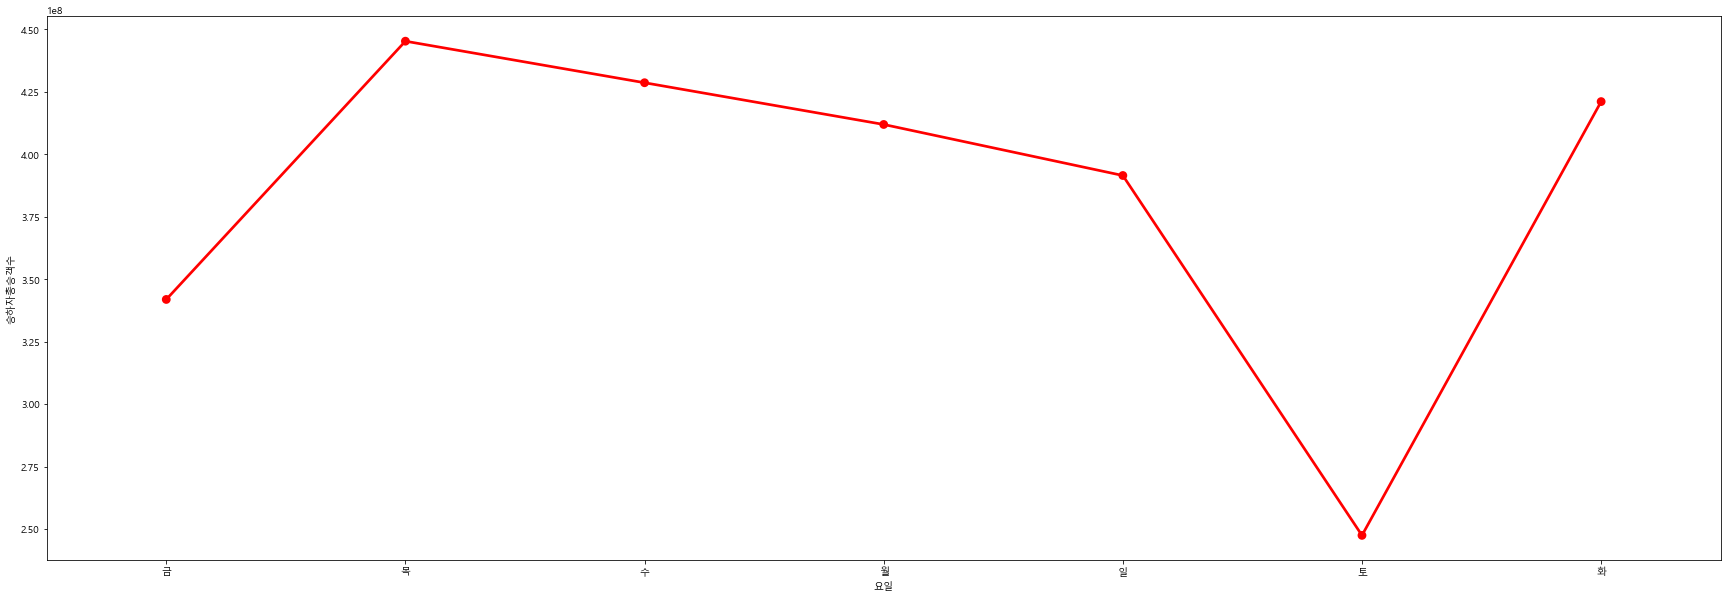

In [9]:
plt.figure(figsize = (30, 10)) 
sns.pointplot(data=a,x='요일',y='승하자총승객수', color="red")

In [10]:
data_month = pd.pivot_table(raw,index=['연월'],values = '승하자총승객수',aggfunc='sum')    #pivot_table 함수로 하였다

In [11]:
data_month.sort_values(by='승하자총승객수',ascending=False)
data_month = data_month.reset_index()

<AxesSubplot: xlabel='연월', ylabel='승하자총승객수'>

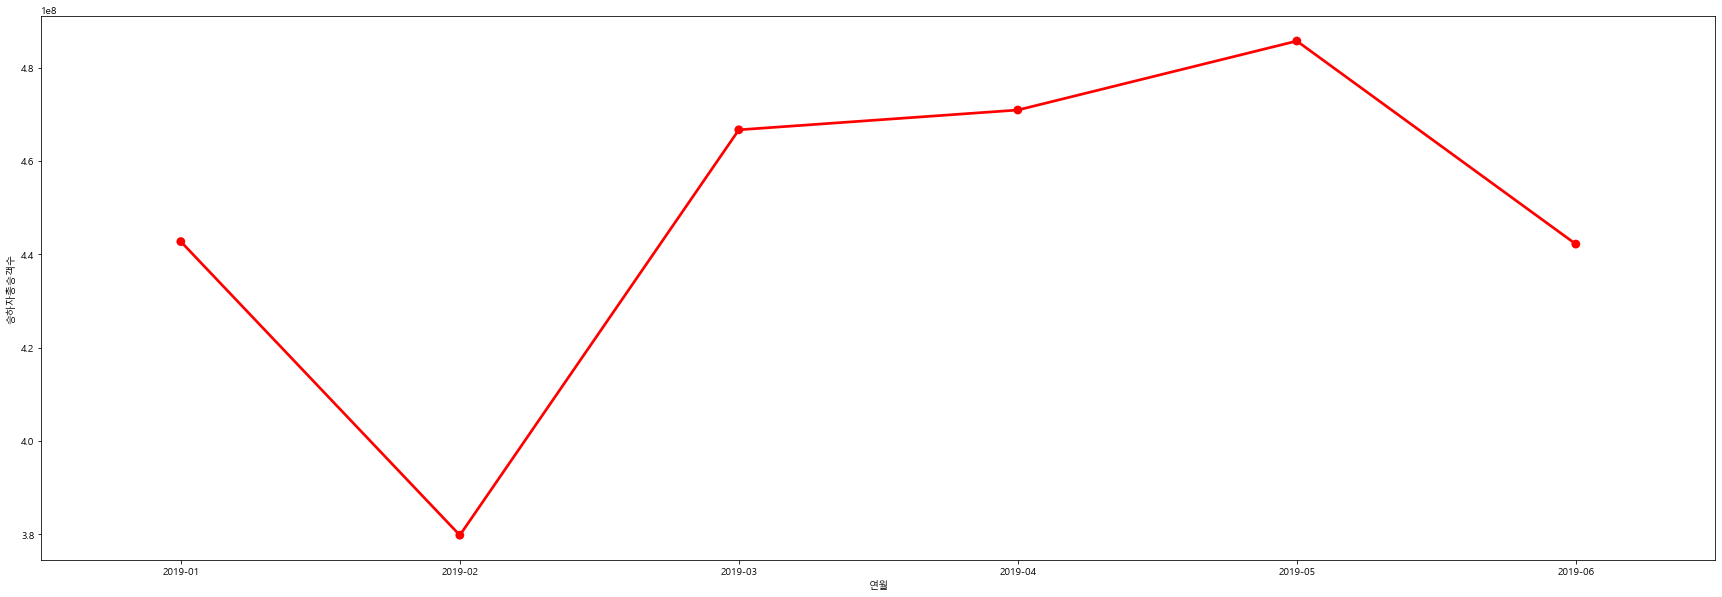

In [12]:
plt.figure(figsize = (30, 10)) 
sns.pointplot(data=data_month,x='연월',y='승하자총승객수', color="red")

# 내림차순으로 정렬 ( sort_value)를 사용하여 5월이 가장많은것을 알 수 있다

# 같은 방법으로 요일중에 목요일이 지하철 승객 수 가 많다

In [13]:
data_week = pd.pivot_table(raw, index = '요일', values = '승차총승객수', aggfunc='sum')
data_week = data_week.sort_values(by = '승차총승객수', ascending= False)
data_week

,승차총승객수
요일,
목,223054017.0
수,214736048.0
화,210947599.0
월,206367797.0
일,196122495.0
금,171426749.0
토,124156061.0


In [14]:
month_1_pivot = pd.pivot_table(raw,index=['월일'],values='승하자총승객수',aggfunc='sum')
month_1_pivot = month_1_pivot.reset_index()
month_1_pivot.head()

,월일,승하자총승객수
0,01-01,6813453.0
1,01-02,15214002.0
2,01-03,15716213.0
3,01-04,16509281.0
4,01-05,12092335.0


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib import font_manager, rc
import platform 

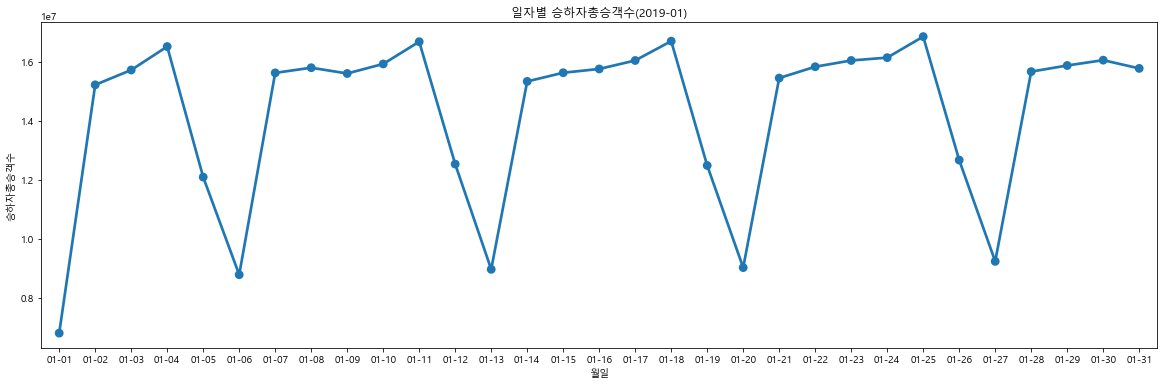

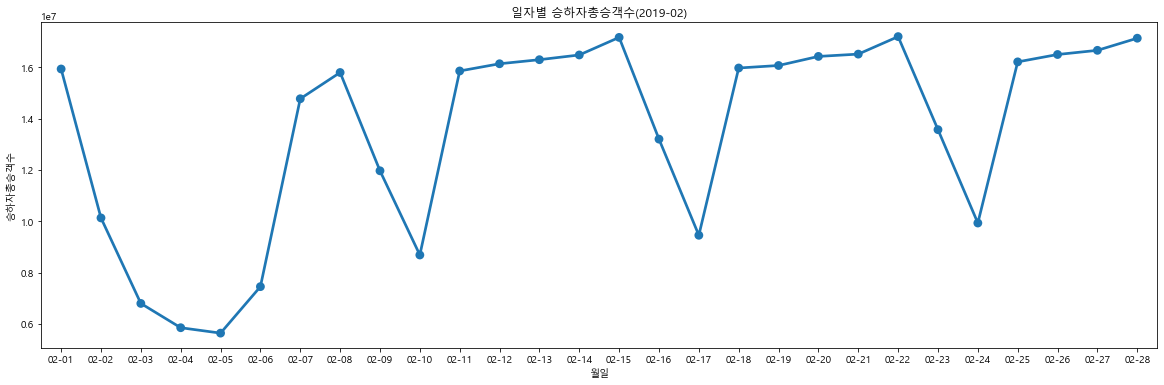

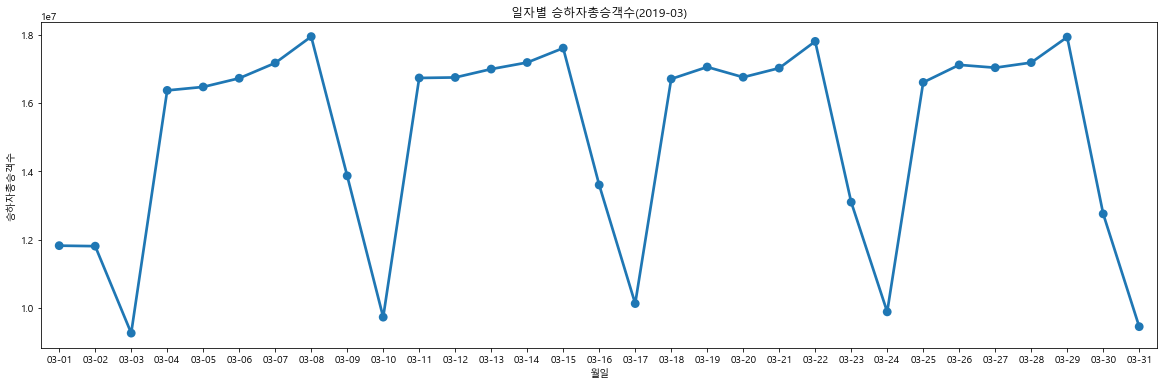

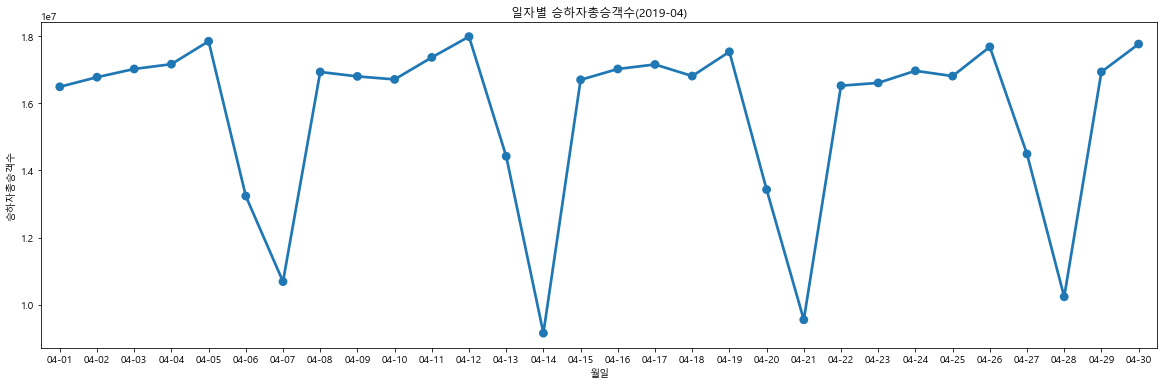

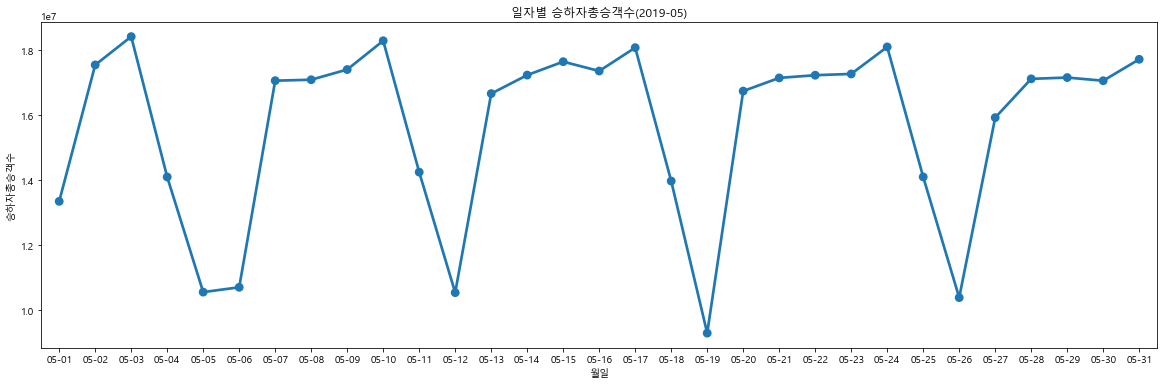

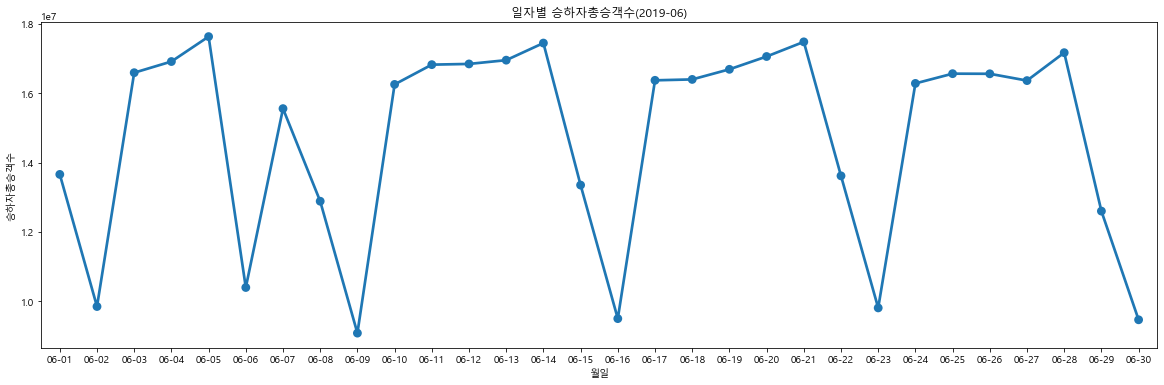

In [16]:
for yearmonth in raw['연월'].unique():
    df_selected = raw[ raw['연월'] == yearmonth]
    df_pivot = pd.pivot_table(df_selected, index = ['월일','요일'], values = '승하자총승객수', aggfunc= 'sum')
    df_pivot = df_pivot.reset_index()
    
    fig, ax = plt.subplots( figsize=(20,6) )
    
    ax.set_title(f'일자별 승하자총승객수({yearmonth})')  # 그래프 제목 추가하기
    sns.pointplot(data = df_pivot, x = '월일', y = '승하자총승객수')

# 가장 승객이 많이 타는 승차역은?

In [17]:
name_subway = raw.pivot_table(index='역명',values='승하자총승객수',aggfunc='sum')
name_subway = name_subway.sort_values(by = '승하자총승객수', ascending = False)
name_subway.head()

,승하자총승객수
역명,
잠실,36964397.0
강남,36618233.0
홍대입구,35593444.0
고속터미널,35302636.0
서울역,34305342.0


# 잠실역인 것을 알 수 있다

# 노선별로 역별/요일별 승차승객수 비교 (heatmap)

In [18]:
raw.head()

,사용일자,월,요일,노선명,역명,승차총승객수,하차총승객수,승하자총승객수,등록일자,연월,월일
0,2019-01-01,01,월,2호선,을지로4가,3862.0,3728.0,7590.0,20190104,2019-01,01-01
1,2019-01-01,01,월,3호선,을지로3가,8104.0,7554.0,15658.0,20190104,2019-01,01-01
2,2019-01-01,01,월,2호선,을지로입구,22478.0,21330.0,43808.0,20190104,2019-01,01-01
3,2019-01-01,01,월,2호선,시청,8381.0,6049.0,14430.0,20190104,2019-01,01-01
4,2019-01-01,01,월,6호선,동묘앞,8045.0,8504.0,16549.0,20190104,2019-01,01-01


In [19]:
line='1호선'
way_1 = raw[raw['노선명']==line]
way_1.head()

,사용일자,월,요일,노선명,역명,승차총승객수,하차총승객수,승하자총승객수,등록일자,연월,월일
6,2019-01-01,01,월,1호선,제기동,10187.0,10178.0,20365.0,20190104,2019-01,01-01
7,2019-01-01,01,월,1호선,신설동,6832.0,6930.0,13762.0,20190104,2019-01,01-01
9,2019-01-01,01,월,1호선,종로5가,13578.0,13282.0,26860.0,20190104,2019-01,01-01
10,2019-01-01,01,월,1호선,종각,20944.0,16658.0,37602.0,20190104,2019-01,01-01
52,2019-01-01,01,월,1호선,신설동,2525.0,2197.0,4722.0,20190104,2019-01,01-01


In [20]:
if platform.system() == 'Windows': 
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')

In [21]:
way_1_table = way_1.pivot_table(index='역명',columns='요일',values='승하자총승객수',aggfunc='sum')
way_1_table = way_1_table[['월','화','수','목','금','토','일']]
way_1_table = way_1_table/10000
way_1_table

요일,월,화,수,목,금,토,일
역명,,,,,,,
가능,39.2252,39.8787,40.0372,40.9853,32.8201,24.8703,37.9039
가산디지털단지,362.0083,363.9967,371.4955,371.1481,142.7170,108.6873,348.2169
간석,36.7032,37.1621,37.7741,38.4520,29.2371,21.3121,35.0168
개봉,135.9061,139.0204,140.0814,141.0723,116.5057,84.4428,129.5568
관악,46.8204,46.9448,47.9948,48.2698,40.3493,33.1544,44.0958
...,...,...,...,...,...,...,...
천안,38.0640,37.1140,38.0199,40.7601,43.1578,39.5765,37.1771
평택,72.0086,72.6464,72.5904,79.3409,81.5067,73.7809,71.0527
화서,48.2195,48.6700,49.3347,49.7238,37.8820,27.5998,45.8406


<AxesSubplot: xlabel='요일', ylabel='역명'>

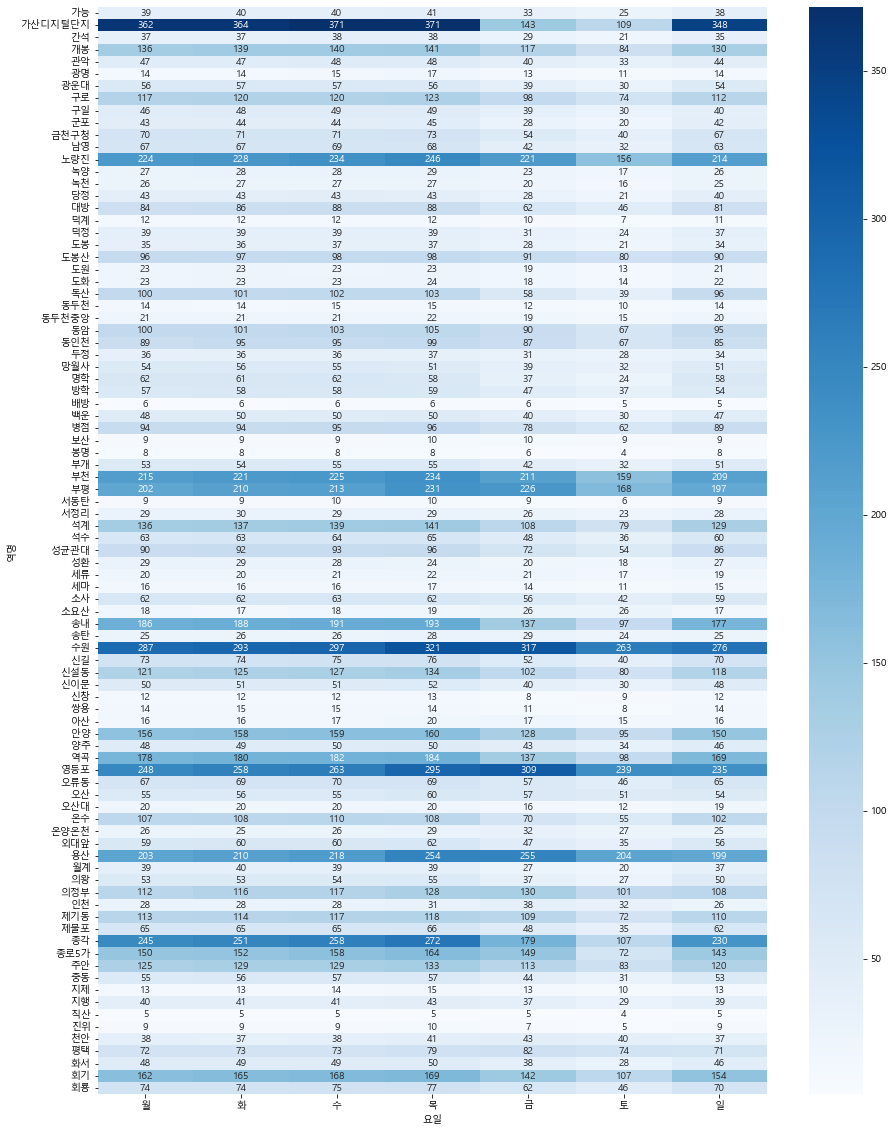

In [22]:
fig,ax=plt.subplots(figsize=(15,20))
sns.heatmap(way_1_table, cmap = "Blues", 
           annot = True, fmt = '.0f')

In [23]:
line_seoul_list = [ ]
for line in raw['노선명'].unique():
    if line[1:] == '호선':    # x호선 인 경우를 선택. 
        line_seoul_list.append(line)
line_seoul_list


['2호선', '3호선', '6호선', '1호선', '4호선', '7호선', '5호선', '8호선', '9호선']

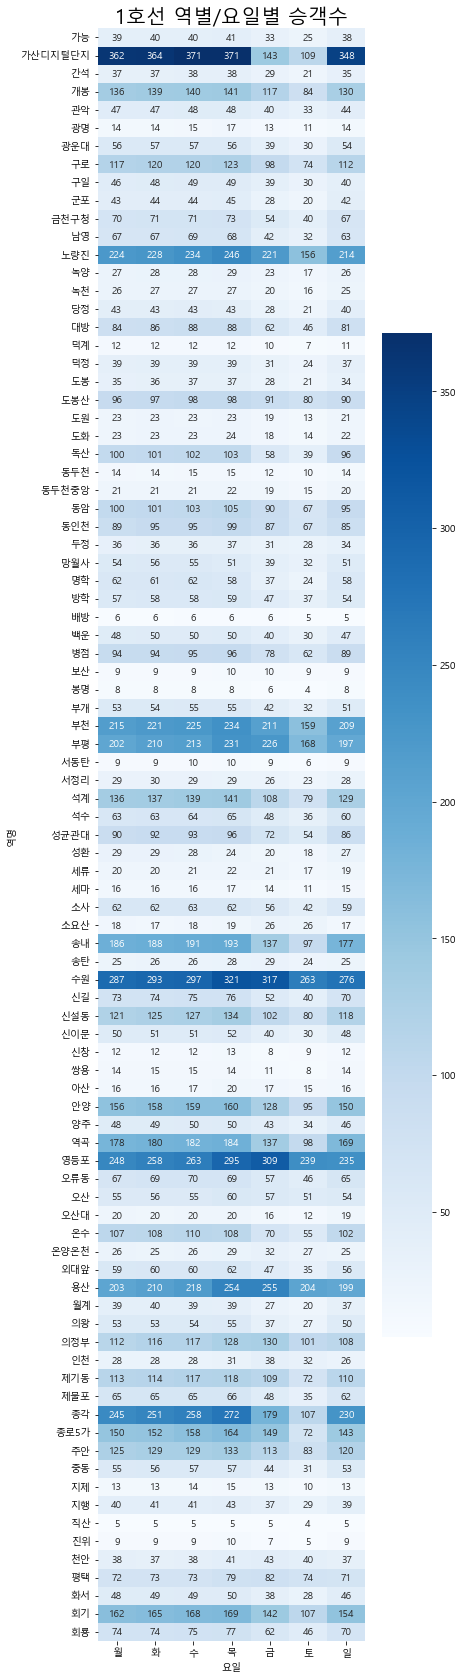

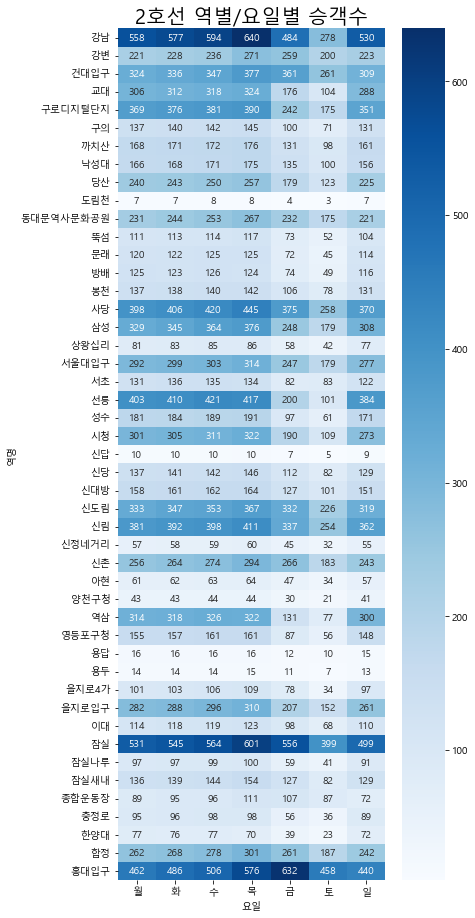

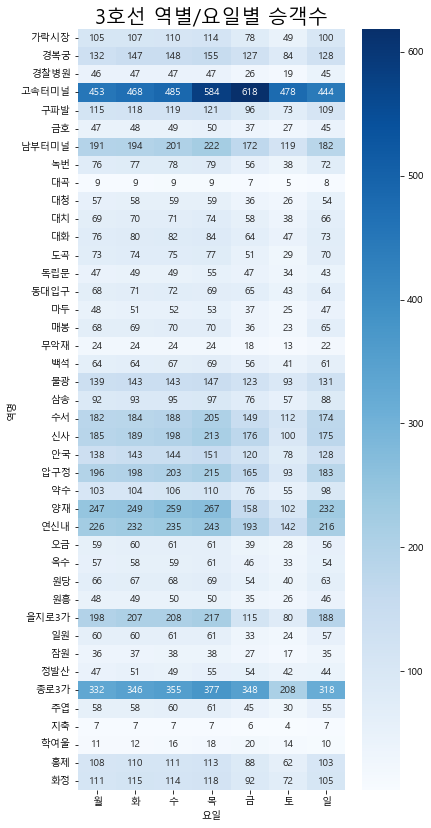

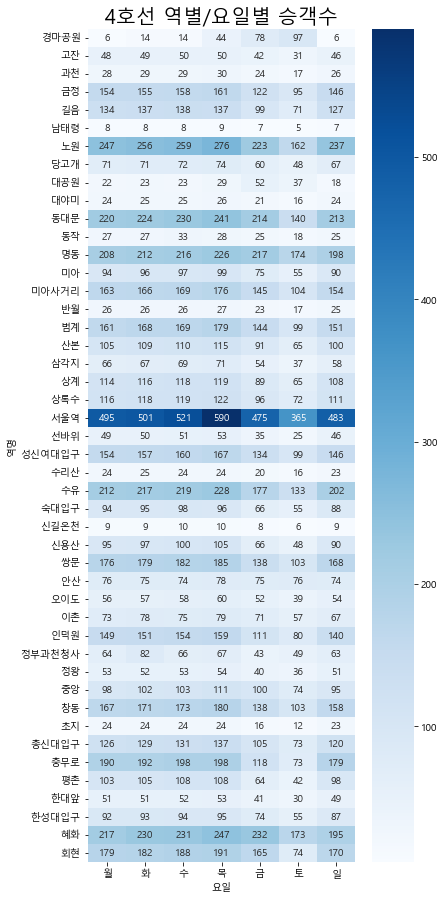

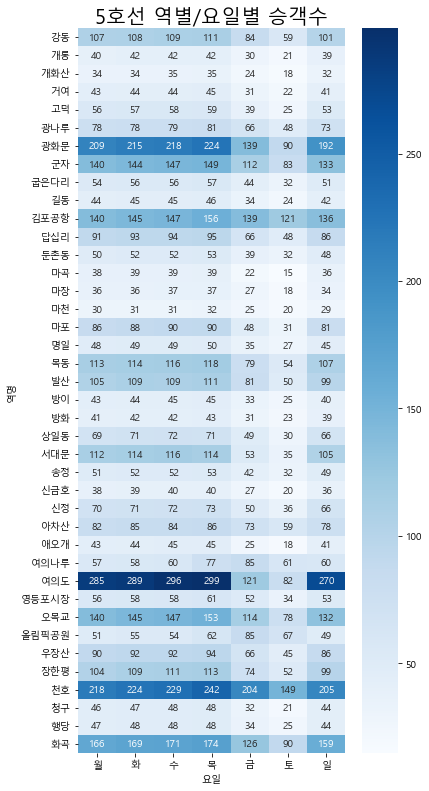

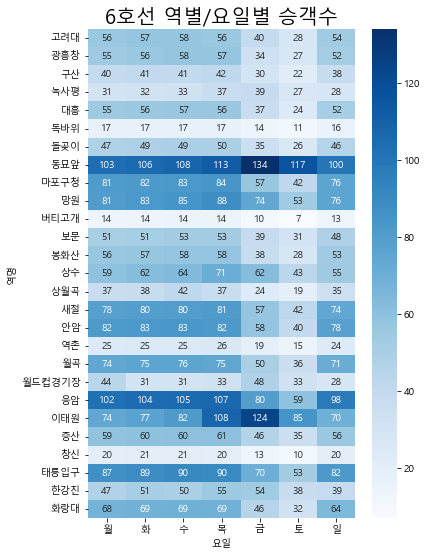

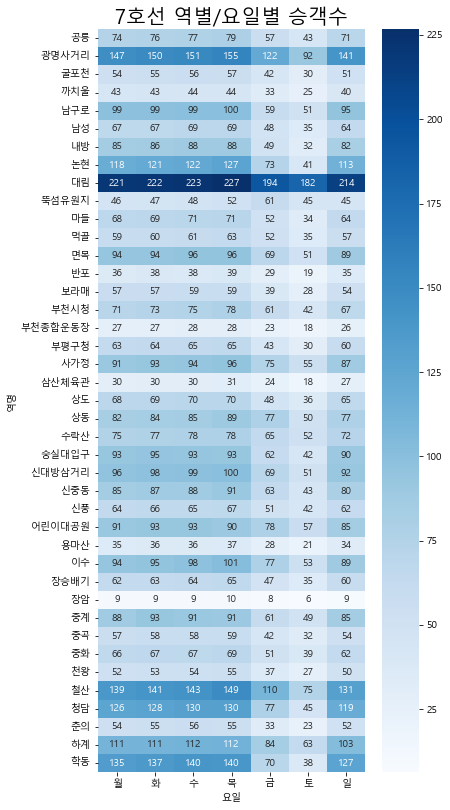

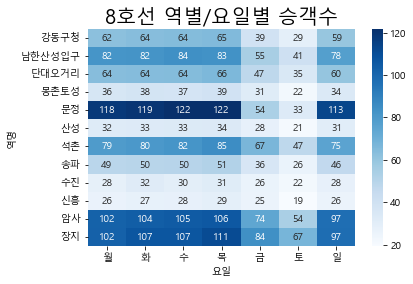

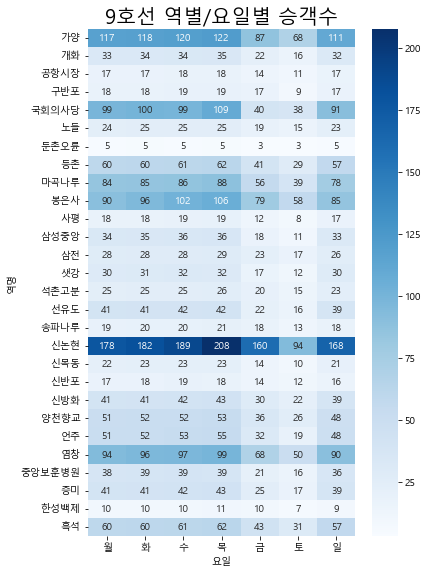

In [24]:
for line in sorted(line_seoul_list):
    
    # 데이터 정리하기
    data_line = raw[raw['노선명'] == line]
    df_pivot = data_line.pivot_table(index = '역명', columns = '요일', values = '승하자총승객수',aggfunc = 'sum')
    df_pivot = df_pivot[['월','화','수','목','금','토','일']]
    df_pivot = df_pivot / 10000  # 만명단위로 수정
    
    
    # 그래프 그리기
    fig, ax = plt.subplots( figsize=(6,len(df_pivot)/3 ) )   # 그래프 사이즈를 조정하여, 역 수가 많은 경우는 세로를 길게 표현
    plt.title(f"{line} 역별/요일별 승객수", fontsize = 20) # for title
    sns.heatmap(df_pivot, cmap = "Blues", 
               annot = True, fmt = '.0f')

In [25]:
a = pd.DataFrame()

In [26]:
a = raw.groupby('노선명').get_group('1호선')
a=a.reset_index()
print(a)

       index       사용일자   월 요일  노선명    역명   승차총승객수   하차총승객수  승하자총승객수  \
0          6 2019-01-01  01  월  1호선   제기동  10187.0  10178.0  20365.0   
1          7 2019-01-01  01  월  1호선   신설동   6832.0   6930.0  13762.0   
2          9 2019-01-01  01  월  1호선  종로5가  13578.0  13282.0  26860.0   
3         10 2019-01-01  01  월  1호선    종각  20944.0  16658.0  37602.0   
4         52 2019-01-01  01  월  1호선   신설동   2525.0   2197.0   4722.0   
...      ...        ...  .. ..  ...   ...      ...      ...      ...   
17914  17558 2019-06-30  06  토  1호선    신창   1146.0   1357.0   2503.0   
17915  17615 2019-06-30  06  토  1호선    인천   1231.0   1972.0   3203.0   
17916  17642 2019-06-30  06  토  1호선    신길   1713.0   1890.0   3603.0   
17917  17712 2019-06-30  06  토  1호선    석계   8307.0   8061.0  16368.0   
17918  17717 2019-06-30  06  토  1호선   도봉산   6684.0   9478.0  16162.0   

           등록일자       연월     월일  
0      20190104  2019-01  01-01  
1      20190104  2019-01  01-01  
2      20190104  2019-01  01-01  

In [27]:
a= a.groupby('역명').sum()['하차총승객수']
a=a.reset_index()

In [28]:

a=a.sort_values(by='하차총승객수',ascending=False)
print(a)

         역명      하차총승객수
1   가산디지털단지  10571381.0
52       수원  10226609.0
62      영등포   9432067.0
69       용산   7817685.0
12      노량진   7603258.0
..      ...         ...
40      서동탄    287651.0
83       진위    271336.0
36       봉명    238683.0
32       배방    195569.0
82       직산    173994.0

[89 rows x 2 columns]


# 가산 디지털 단지가 가장 많은것을 알 수 있다.

In [30]:
file_map = r'.\rawfiles\CARD_SUBWAY_MONTH_201902.csv'
file_map2=r'.\rawfiles\지하철노선위경도정보2.csv'
temp1=pd.read_csv(file_map)
temp2=pd.read_csv(file_map2)

mmap=pd.concat([temp1,temp2],axis =0)

In [31]:
import folium

In [32]:
m = folium.Map(location = ['37.5536067','126.9674308'], zoom_start = 13)   # 서울역 중심
m

In [33]:
line_2 = raw[raw['노선명']=='2호선']

In [34]:
line_2_data = line_2.pivot_table(index='역명',values='승차총승객수',aggfunc='sum')
line_2_data

,승차총승객수
역명,
강남,18148024.0
강변,8267462.0
건대입구,11123655.0
교대,9156484.0
구로디지털단지,11421335.0
구의,4407091.0
까치산,5526065.0
낙성대,5454622.0
당산,7452044.0


In [35]:
line_2_data.sort_values(by='승차총승객수',ascending=False)

,승차총승객수
역명,
잠실,18574323.0
강남,18148024.0
홍대입구,17270084.0
사당,13294251.0
신림,12831374.0
선릉,11582155.0
구로디지털단지,11421335.0
신도림,11420882.0
건대입구,11123655.0


In [36]:
location_line_2 = temp2[temp2['호선']=='2호선']
location_line_2 = location_line_2[location_line_2['역지역']=='수도권']


In [37]:

location_line_2=location_line_2 [['역이름','위도','경도',]]
location_line_2=location_line_2.rename(columns={'역이름':'역명'})
location_line_2.reset_index()

,index,역명,위도,경도
0,0,낙성대,37.477090,126.963506
1,2,서울대입구,37.481285,126.952695
2,7,강변,37.535118,127.094723
3,8,영등포구청,37.525831,126.896668
4,10,잠실새내,37.511608,127.086301
5,11,당산,37.534774,126.902607
6,13,충정로,37.559748,126.964484
7,15,종합운동장,37.511130,127.073836
8,16,합정,37.549901,126.914447
9,18,홍대입구,37.556864,126.923765


In [38]:
data_set=pd.merge(location_line_2,line_2_data,on='역명')

In [39]:
data_set.head()

,역명,위도,경도,승차총승객수
0,낙성대,37.477090,126.963506,5454622.0
1,서울대입구,37.481285,126.952695,9712111.0
2,강변,37.535118,127.094723,8267462.0
3,영등포구청,37.525831,126.896668,4593668.0
4,잠실새내,37.511608,127.086301,4535759.0


In [40]:
data_set=data_set.sort_values(by='승차총승객수',ascending=False)
data_set=data_set.reset_index()
data_set.head()


,index,역명,위도,경도,승차총승객수
0,40,잠실,37.513309,127.100215,18574323.0
1,15,강남,37.498085,127.027978,18148024.0
2,9,홍대입구,37.556864,126.923765,17270084.0
3,18,사당,37.476553,126.981549,13294251.0
4,20,신림,37.484264,126.929741,12831374.0


In [41]:
print(data_set['승차총승객수'].max())

18574323.0


In [42]:
for i in data_set.index:
    folium.Circle([data_set['위도'][i],data_set['경도'][i]],radius=data_set['승차총승객수'][i]/10000,
    popup=data_set['역명'][i],color='#3186cc',fill_color='#3186cc').add_to(m)

In [43]:
m

In [44]:
for i in data_set.index:
        folium.Circle([data_set['위도'][i],data_set['경도'][i]],radius=data_set['승차총승객수'][i]/10000,
        popup=data_set['역명'][i],color='#3186cc',fill_color='#3186cc').add_to(m)
m        

In [50]:
data_set.sort_values(by='승차총승객수',ascending=False)

,index,역명,위도,경도,승차총승객수
0,40,잠실,37.513309,127.100215,18574323.0
1,15,강남,37.498085,127.027978,18148024.0
2,9,홍대입구,37.556864,126.923765,17270084.0
3,18,사당,37.476553,126.981549,13294251.0
4,20,신림,37.484264,126.929741,12831374.0
5,12,선릉,37.504494,127.048948,11582155.0
6,22,구로디지털단지,37.485253,126.901473,11421335.0
7,23,신도림,37.508905,126.891308,11420882.0
8,37,건대입구,37.540398,127.069203,11123655.0
9,10,삼성,37.508812,127.063021,10611401.0
